<a href="https://colab.research.google.com/github/ashutosh-mtx/MachineLearning/blob/main/ML_Assignment_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning - 2
#### From: Ashutosh, Date: 17-May-2021
In this assignment you'll explore the relationship between model complexity and generalization performance, by adjusting key parameters of various supervised learning models. Part 1 of this assignment will look at regression and Part 2 will look at classification.

## Part 1 - Regression

First, run the following block to set up the variables needed for later sections.

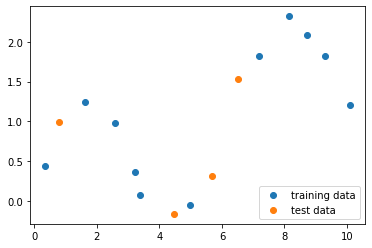

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# You can use this function to help you visualize the dataset by
# plotting a scatterplot of the data points
# in the training and test sets.
def part1_scatter():
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);
    
    
# NOTE: Uncomment the function below to visualize the data, but be sure 
# to **re-comment it before submitting this assignment to the autograder**.   
part1_scatter()

### Question 1

Write a function that fits a polynomial LinearRegression model on the training data X_train for degrees 1, 3, 6, and 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. np.linspace(0,10,100)) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

The figure above shows the fitted models plotted on top of the original data (using plot_one()).

*This function should return a numpy array with shape `(4, 100)`*

In [ ]:
def answer_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures

    # Your code here
    X_train_new = X_train.reshape(-1,1)
    runtest = np.linspace(0,10,100)

    x_runtest = runtest.reshape(100,1)

    ret_np = np.zeros((4,100))
    degress = [1,3,6,9]
    for i, d in enumerate(degress):
        poly = PolynomialFeatures(degree=d)
        
        X_poly = poly.fit_transform(X_train_new)
        linreg = LinearRegression().fit(X_poly, y_train)
        
        #print("Degree:", d)
        #print("X_train Shape:", X_poly.shape)

        pred = linreg.predict(poly.fit_transform(x_runtest))
        #np.append(ret_np, pred)
        ret_np[i,:] = pred
        
    return ret_np# Return your answer

ret_data = answer_one()
print("Shape of ret data: ", ret_data.shape)
#print("Values of ret data: ", ret_data)

Shape of ret data:  (4, 100)


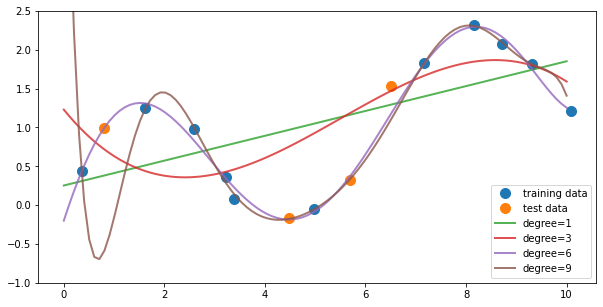

In [ ]:
# feel free to use the function plot_one() to replicate the figure 
# from the prompt once you have completed question one
def plot_one(degree_predictions):
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(answer_one())

### Question 2

Write a function that fits a polynomial LinearRegression model on the training data X_train for degrees 0 through 9. For each model compute the 𝑅2

(coefficient of determination) regression score on the training data as well as the the test data, and return both of these arrays in a tuple.

This function should return one tuple of numpy arrays (r2_train, r2_test). Both arrays should have shape (10,)

In [ ]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    #from sklearn.metrics.regression import r2_score

    # Your code here
    X_train_new = X_train.reshape(-1,1)
    X_test_new = X_test.reshape(-1,1)
    r2_train = np.zeros(10)
    r2_test = np.zeros(10)
    for i in range(0, 10):
        poly = PolynomialFeatures(degree=i)
        
        X_poly = poly.fit_transform(X_train_new)
        linreg = LinearRegression().fit(X_poly, y_train)
        
        #print("Degree: ", i)
        #print('R-squared score (training): {:.3f}'
        #     .format(linreg.score(poly.fit_transform(X_train_new), y_train)))
        #print('R-squared score (test): {:.3f}'
        #.format(linreg.score(poly.fit_transform(X_test_new), y_test)))
             
        
        r2_train[i] = linreg.score(poly.fit_transform(X_train_new), y_train)
        r2_test[i] = linreg.score(poly.fit_transform(X_test_new), y_test)
        
    return r2_train,r2_test # Your answer here

ret_data = answer_two()
print("Shape of ret data: ", [len(item) for item in ret_data])

Shape of ret data:  [10, 10]


### Question 3

Based on the 𝑅2

scores from question 2 (degree levels 0 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset?

Hint: Try plotting the 𝑅2
scores from question 2 to visualize the relationship between degree level and 𝑅2

. Remember to comment out the import matplotlib line before submission.

This function should return one tuple with the degree values in this order: (Underfitting, Overfitting, Good_Generalization). There might be multiple correct solutions, however, you only need to return one possible solution, for example, (1,2,3). 

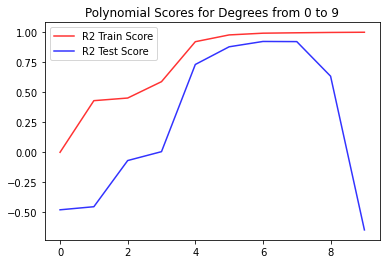

In [ ]:
def plot_answer_three():
    import matplotlib.pyplot as plt
    
    r2_train, r2_test = answer_two()
    
    degrees = np.arange(0, 10)
    plt.figure()
    plt.plot(degrees, r2_train, c='red', alpha=.8, label="R2 Train Score")
    plt.plot(degrees, r2_test, c='blue', alpha=.8, label="R2 Test Score")
    plt.legend()
    plt.title("Polynomial Scores for Degrees from 0 to 9")
    plt.show()
    
plot_answer_three()


#### Inferring from the above matplotlib

Following values inferred from the plot
UnderFitting: 0
OverFitting: 9
Good_Generalization: 6 or 7
Can find above by finding the difference of R2Train and R2Test Scores
UnderFitting: The test score and training score will be low, basically the lowest test score can be termed as underfitting.
Overfitting: The test score and training score difference will be highest among all. 
The training score will be very high and the test score will be very low.
Good Generalization: The training score and test score difference will be the lowest. The train and test scores will be high and the difference among them will also be the lowest.

In [ ]:
def answer_three():

    # Your code here
    r2_train, r2_test = answer_two()
    diff_scores = r2_train - r2_test
    #print(diff_scores)
    #print("Underfitting -> Value: {} Degree: {}".format(min(r2_train), np.argmin(r2_train)))
    #print("OverFitting -> Value: {} Degree: {}".format(max(diff_scores), np.argmax(diff_scores)))
    #print("Good Generalization -> Value: {} Degree: {}".format(min(diff_scores), np.argmin(diff_scores)))
    
    # This function is not optimized to work for all conditions
    
    return(np.argmin(r2_train), np.argmax(diff_scores), np.argmin(diff_scores))# Return your answer

(Underfitting, Overfitting, Good_Generalization) = answer_three()
print("Underfitting : ", Underfitting)
print("OverFitting : ", Overfitting)
print("Good_Generalization : ", Good_Generalization)

Underfitting :  0
OverFitting :  9
Good_Generalization :  6


#### Question 4

Training models on high degree polynomial features can result in overly complex models that overfit, so we often use regularized versions of the model to constrain model complexity, as we saw with Ridge and Lasso linear regression.

For this question, train two models: a non-regularized LinearRegression model (default parameters) and a regularized Lasso Regression model (with parameters alpha=0.01, max_iter=10000) both on polynomial features of degree 12. Return the 𝑅2

score for both the LinearRegression and Lasso model's test sets.

This function should return one tuple (LinearRegression_R2_test_score, Lasso_R2_test_score)

In [ ]:
def answer_four():
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression
    #from sklearn.metrics.regression import r2_score

    # Your code here
    poly_d12 = PolynomialFeatures(degree=12)
        
    X_polyd12_train = poly_d12.fit_transform(X_train.reshape(-1, 1))
    X_polyd12_test = poly_d12.fit_transform(X_test.reshape(-1, 1))
        
    lr_model = LinearRegression().fit(X_polyd12_train, y_train)
    lr_score = lr_model.score(X_polyd12_test, y_test)
    
    #print('(poly deg 2) linear model coeff (w):\n{}'
     #.format(lr_model.coef_))
    
    lasso_model = Lasso(alpha=0.01, max_iter=10000).fit(X_polyd12_train, y_train)
    lasso_score = lasso_model.score(X_polyd12_test, y_test)
    
    return lr_score, lasso_score # Your answer here

(LinearRegression_R2_test_score, Lasso_R2_test_score) = answer_four()
print("LinearRegression_R2_test_score : ", LinearRegression_R2_test_score)
print("Lasso_R2_test_score : ", Lasso_R2_test_score)

LinearRegression_R2_test_score :  -4.312001794976416
Lasso_R2_test_score :  0.8406625614750235


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3556421695890253, tolerance: 0.0006894982540382801
  positive)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3556421695890253, tolerance: 0.0006894982540382801
  positive)


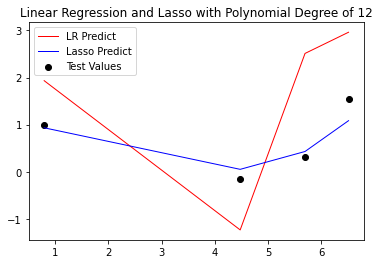

LinearRegression_R2_test_score :  -4.312001794976416
Lasso_R2_test_score :  0.8406625614750235


In [ ]:
def plot_answer_four():
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression
    #from sklearn.metrics.regression import r2_score

    # Your code here
    poly_d12 = PolynomialFeatures(degree=12)
        
    X_polyd12_train = poly_d12.fit_transform(X_train.reshape(-1, 1))
    X_polyd12_test = poly_d12.fit_transform(X_test.reshape(-1, 1))
        
    lr_model = LinearRegression().fit(X_polyd12_train, y_train)
    lr_score = lr_model.score(X_polyd12_test, y_test)
    
    y_lr_pred = lr_model.predict(X_polyd12_test)

    lasso_model = Lasso(alpha=0.01, max_iter=10000).fit(X_polyd12_train, y_train)
    lasso_score = lasso_model.score(X_polyd12_test, y_test)
    
    y_lasso_pred = lasso_model.predict(X_polyd12_test)
    
    plt.figure()
    plt.scatter(X_test, y_test,  color='black', label="Test Values")
    plt.plot(X_test, y_lr_pred, color='red', linewidth=1, label="LR Predict")
    plt.plot(X_test, y_lasso_pred, color='blue', linewidth=1, label="Lasso Predict")
    plt.legend()
    plt.title("Linear Regression and Lasso with Polynomial Degree of 12")
    plt.show()
    
    return lr_score, lasso_score # Your answer here

(LinearRegression_R2_test_score, Lasso_R2_test_score) = plot_answer_four()
print("LinearRegression_R2_test_score : ", LinearRegression_R2_test_score)
print("Lasso_R2_test_score : ", Lasso_R2_test_score)

### Part 2 - Classification

Here's an application of machine learning that could save your life! For this section of the assignment we will be working with the UCI Mushroom Data Set stored in mushrooms.csv. The data will be used to train a model to predict whether or not a mushroom is poisonous. The following attributes are provided:

Attribute Information:

    cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
    cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s
    cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
    bruises?: bruises=t, no=f
    odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
    gill-attachment: attached=a, descending=d, free=f, notched=n
    gill-spacing: close=c, crowded=w, distant=d
    gill-size: broad=b, narrow=n
    gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
    stalk-shape: enlarging=e, tapering=t
    stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
    stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s
    stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s
    stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
    stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
    veil-type: partial=p, universal=u
    veil-color: brown=n, orange=o, white=w, yellow=y
    ring-number: none=n, one=o, two=t
    ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
    spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
    population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
    habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d


The data in the mushrooms dataset is currently encoded with strings. These values will need to be encoded to numeric to work with sklearn. We'll use pd.get_dummies to convert the categorical variables into indicator variables.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

url_csv_file = "https://github.com/ashutosh-mtx/MachineLearning/raw/main/mushrooms.csv"
mush_df = pd.read_csv(url_csv_file)
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]

# use the variables X_train2, y_train2 for Question 5
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

# For performance reasons in Questions 6 and 7, we will create a smaller version of the
# entire mushroom dataset for use in those questions.  For simplicity we'll just re-use
# the 25% test split created above as the representative subset.
#
# Use the variables X_subset, y_subset for Questions 6 and 7.
X_subset = X_test2
y_subset = y_test2

### Question 5

Using X_train2 and y_train2 from the preceeding cell, train a DecisionTreeClassifier with default parameters and random_state=0. What are the 5 most important features found by the decision tree?

As a reminder, the feature names are available in the X_train2.columns property, and the order of the features in X_train2.columns matches the order of the feature importance values in the classifier's feature_importances_ property.

This function should return a list of length 5 containing the feature names in descending order of importance.

Note: remember that you also need to set random_state in the DecisionTreeClassifier.


In [ ]:
def answer_five():
    from sklearn.tree import DecisionTreeClassifier

    # Your code here
    clf = DecisionTreeClassifier(random_state=1).fit(X_train2, y_train2)
    
    #print(X_train2.columns)
    tuple_features = zip(clf.feature_importances_, X_train2.columns)
    #print(tuple_features)
    #for x in tuple_features:
    #    print(x) 
    sort_features = sorted(tuple_features, key=lambda item: item[0], reverse=True)
    #print(type(sort_features))
    #for x in sort_features:
    #    print(x) 
    first_five = [item[1] for item in sort_features[0:5]]
    
    return first_five# Your answer here
    
answer_five()

['odor_n',
 'stalk-root_c',
 'stalk-root_r',
 'spore-print-color_r',
 'spore-print-color_u']

In [ ]:
def answer_five_df_sorted():
    from sklearn.tree import DecisionTreeClassifier

    # Your code here
    clf = DecisionTreeClassifier(random_state=1).fit(X_train2, y_train2)
    
    df = pd.DataFrame({"importance" : clf.feature_importances_, "names":X_train2.columns})
    df.sort_values(by="importance", ascending=False, inplace=True)
    #print(df.head())
    #print(list(df.names[0:5]))
    return list(df.names[0:5])# Your answer here

answer_five_df_sorted()

['odor_n',
 'stalk-root_c',
 'stalk-root_r',
 'spore-print-color_r',
 'spore-print-color_u']

### Question 6

For this question, we're going to use the validation_curve function in sklearn.model_selection to determine training and test scores for a Support Vector Classifier (SVC) with varying parameter values. Recall that the validation_curve function, in addition to taking an initialized unfitted classifier object, takes a dataset as input and does its own internal train-test splits to compute results.

Because creating a validation curve requires fitting multiple models, for performance reasons this question will use just a subset of the original mushroom dataset: please use the variables X_subset and y_subset as input to the validation curve function (instead of X_mush and y_mush) to reduce computation time.

The initialized unfitted classifier object we'll be using is a Support Vector Classifier with radial basis kernel. So your first step is to create an SVC object with default parameters (i.e. kernel='rbf', C=1) and random_state=0. Recall that the kernel width of the RBF kernel is controlled using the gamma parameter.

With this classifier, and the dataset in X_subset, y_subset, explore the effect of gamma on classifier accuracy by using the validation_curve function to find the training and test scores for 6 values of gamma from 0.0001 to 10 (i.e. np.logspace(-4,1,6)). Recall that you can specify what scoring metric you want validation_curve to use by setting the "scoring" parameter. In this case, we want to use "accuracy" as the scoring metric.

For each level of gamma, validation_curve will fit 3 models on different subsets of the data, returning two 6x3 (6 levels of gamma x 3 fits per level) arrays of the scores for the training and test sets.

Find the mean score across the three models for each level of gamma for both arrays, creating two arrays of length 6, and return a tuple with the two arrays.

e.g.

if one of your array of scores is

array([[ 0.5,  0.4,  0.6],
       [ 0.7,  0.8,  0.7],
       [ 0.9,  0.8,  0.8],
       [ 0.8,  0.7,  0.8],
       [ 0.7,  0.6,  0.6],
       [ 0.4,  0.6,  0.5]])

it should then become

array([ 0.5,  0.73333333,  0.83333333,  0.76666667,  0.63333333, 0.5])

This function should return one tuple of numpy arrays (training_scores, test_scores) where each array in the tuple has shape (6,).


In [ ]:
def answer_six():
    from sklearn.svm import SVC
    from sklearn.model_selection import validation_curve

    # Your code here
    clf = SVC(kernel = 'rbf', C=1, random_state=0).fit(X_subset, y_subset)
    param_range = np.logspace(-4,1,6)
    train_scores, test_scores = validation_curve(clf, X_subset, y_subset,
                                            param_name='gamma',
                                            param_range=param_range, 
                                            scoring="accuracy",
                                            cv=3)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    return train_scores_mean, test_scores_mean# Your answer here

train_scores_mean, test_scores_mean = answer_six()
print("Train Scores Mean :", train_scores_mean)
print("Test Scores Mean:", test_scores_mean)

Train Scores Mean : [0.56646972 0.93106844 0.990645   1.         1.         1.        ]
Test Scores Mean: [0.56720827 0.9300837  0.98966027 1.         0.99458395 0.52240276]


### Question 7

Based on the scores from question 6, what gamma value corresponds to a model that is underfitting (and has the worst test set accuracy)? What gamma value corresponds to a model that is overfitting (and has the worst test set accuracy)? What choice of gamma would be the best choice for a model with good generalization performance on this dataset (high accuracy on both training and test set)?

Hint: Try plotting the scores from question 6 to visualize the relationship between gamma and accuracy. Remember to comment out the import matplotlib line before submission.

This function should return one tuple with the degree values in this order: (Underfitting, Overfitting, Good_Generalization) Please note there is only one correct solution.


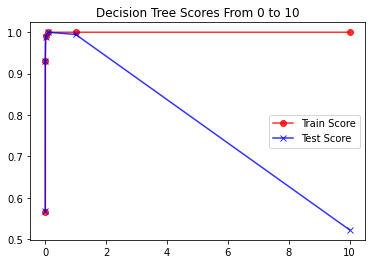

In [ ]:
def answer_seven_plot():
    
    # Your code here
    import matplotlib.pyplot as plt
    
    #train_score, test_score = answer_six()
    train_score = train_scores_mean
    test_score = test_scores_mean
    param_range = np.logspace(-4,1,6)
    
    plt.figure()
    plt.plot(param_range, train_score, c='red', marker='o', alpha=.8, label="Train Score")
    plt.plot(param_range, test_score, c='blue', marker='x', alpha=.8, label="Test Score")
    plt.legend()
    plt.title("Decision Tree Scores From 0 to 10")
    
    plt.show()   
    return # Return your answer

answer_seven_plot()

In [ ]:
def answer_seven():
    
    # Your code here
    #train_score, test_score = answer_six()
    #acccording to the plot 0 is underfitted and 10 is overfitted
    
    #train_score = train_scores_mean
    #test_score = test_scores_mean
    
    
    param_range = np.logspace(-4,1,6)
    print(param_range)
    for i, n in enumerate(param_range):
        print("Value in {} is {} ".format(i, n))
        
    least_index = np.argmin(train_scores_mean)
    train_score = np.delete(train_scores_mean, least_index)
    test_score = np.delete(test_scores_mean, least_index)
    
    under_fiting_val = param_range[least_index]
    param_range = np.delete(param_range, least_index)
    diff_scores = train_score - test_score
    
    print("Score differences: ", diff_scores)

    return(under_fiting_val, 
           param_range[np.argmax(diff_scores)], 
           param_range[np.argmin(diff_scores)])# Return your answer

#Train Scores Mean : [0.56646972 0.93106844 0.990645   1.         1.         1.        ]
#Test Scores Mean: [0.56720827 0.9300837  0.98966027 1.         0.99458395 0.52240276]

    
(Underfitting, Overfitting, Good_Generalization) = answer_seven()
print("Underfitting : ", Underfitting)
print("OverFitting : ", Overfitting)
print("Good_Generalization : ", Good_Generalization)

[1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01]
Value in 0 is 0.0001 
Value in 1 is 0.001 
Value in 2 is 0.01 
Value in 3 is 0.1 
Value in 4 is 1.0 
Value in 5 is 10.0 
Score differences:  [0.00098474 0.00098474 0.         0.00541605 0.47759724]
Underfitting :  0.0001
OverFitting :  10.0
Good_Generalization :  0.1
